## 05-1 클래스

### 클래스는 왜 필요한가?

계산기의 "더하기" 기능을 구현한 파이썬 코드는 다음과 같다.

In [1]:
result = 0

def add(num):
    global result
    result += num
    return result

print(add(3))
print(add(4))
print(add(5))

3
7
12


이전에 계산한 결괏값을 유지하기 위해서 result 전역 변수(global)를 사용했다.

그런데 만일 한 프로그램에서 2대의 계산기가 필요한 상황이 발생하면 어떻게 해야 할까?   
각 계산기는 각각의 결괏값을 유지해야 하기 때문에 위와 같이 add 함수 하나만으로는 결괏값을 따로 유지할 수 없다.

이런 상황을 해결하려면 다음과 같이 함수를 각각 따로 만들어야 한다.

똑같은 일을 하는 add1과 add2 함수를 만들었고 각 함수에서 계산한 결괏값을 유지하면서   
저장하는 전역 변수 result1, result2가 필요하게 되었다.

In [2]:
result1 = 0
result2 = 0

def add1(num):
    global result1
    result1 += num
    return result1

def add2(num):
    global result2
    result2 += num
    return result2

print(add1(3))
print(add1(4))
print(add2(3))
print(add2(7))

3
7
3
10


계산기 1의 결괏값이 계산기 2에 아무 영향을 끼치지 않음을 확인할 수 있다.   
하지만 계산기가 3개, 5개, 10개로 점점 더 많이 필요해진다면 어떻게 해야 할까?   

그때마다 전역 변수와 함수를 추가할 것인가? 여기에 계산기마다 빼기나 곱하기와   
같은 기능을 추가해야 한다면 상황은 점점 더 어려워질 것이다.

아직 클래스에 대해 배우지 않았지만, 위와 같은 경우에 클래스를 사용하면 다음과 같이 간단하게 해결할 수 있다.

In [3]:
class Calculator:
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result
    
cal1 = Calculator()
cal2 = Calculator()

print(cal1.add(3))
print(cal1.add(4))
print(cal2.add(3))
print(cal2.add(7))
    

3
7
3
10


프로그램을 실행하면 함수 2개를 사용했을 때와 동일한 결과가 출력된다.  

Calculator 클래스로 만든 별개의 계산기 cal1, cal2(파이썬에서는 이것을 객체라고 부른다)가 각각의 역할을 수행한다.   
그리고 계산기(cal1, cal2)의 결괏값 역시 다른 계산기의 결괏값과 상관없이 독립적인 값을 유지한다.  
 
클래스를 사용하면 계산기 대수가 늘어나더라도 객체를 생성만 하면 되기 때문에 함수를 사용하는 경우와 달리 매우 간단해진다.   
만약 빼기 기능을 더하려면 Calculator 클래스에 다음과 같은 빼기 기능 함수를 추가해 주면 된다.

```python
class Calculator:
    def __init__(self):
        self.result = 0

    def add(self, num):
        self.result += num
        return self.result

    def sub(self, num): // 추가
        self.result -= num
        return self.result
```

### 클래스와 객체

클래스를 가장 잘 설명 해 주는 다음의 그림을 보자.

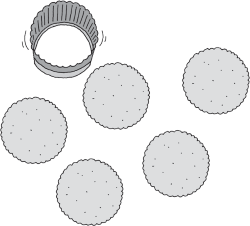

과자를 만드는 과자 틀과 그것을 사용해 만든 과자이다.  

- 과자 틀 → 클래스 (class)
- 과자 틀에 의해서 만들어진 과자 → 객체 (object)

여기에서 설명할 클래스는 과자 틀과 비슷하다.   
클래스(class)란 똑같은 무엇인가를 계속해서 만들어 낼 수 있는 설계 도면이고(과자 틀),  
객체(object)란 클래스로 만든 피조물(과자 틀을 사용해 만든 과자)을 뜻한다.

클래스로 만든 객체에는 중요한 특징이 있다. 바로 객체마다 고유한 성격을 가진다는 것이다.   
과자 틀로 만든 과자에 구멍을 뚫거나 조금 베어 먹더라도 다른 과자에는 아무 영향이 없는 것과 마찬가지로   
동일한 클래스로 만든 객체들은 서로 전혀 영향을 주지 않는다.

다음은 파이썬 클래스의 가장 간단한 예이다.

```python
>>> class Cookie:
>>>     pass
```

위의 클래스는 아무 기능도 갖고 있지 않은 껍질뿐인 클래스이다.   
하지만 이렇게 껍질뿐인 클래스도 객체를 생성하는 기능이 있다. "과자 틀"로 "과자"를 만드는 것처럼 말이다.

객체는 클래스로 만들며 1개의 클래스는 무수히 많은 객체를 만들어 낼 수 있다.   
위에서 만든 Cookie 클래스의 객체를 만드는 방법은 다음과 같다.

```python
>>> a = Cookie()
>>> b = Cookie()
```


Cookie()의 결괏값을 돌려받은 a와 b가 바로 객체이다. 마치 함수를 사용해서 그 결괏값을 돌려받는 모습과 비슷하다.


#### 객체와 인스턴스의 차이

> 클래스로 만든 객체를 인스턴스라고도 한다. 그렇다면 객체와 인스턴스의 차이는 무엇일까?   
>  
> 이렇게 생각해 보자. a = Cookie() 이렇게 만든 a는 객체이다.   
> 그리고 a 객체는 Cookie의 인스턴스이다.   
> 즉 인스턴스라는 말은 특정 객체(a)가 어떤 클래스(Cookie)의 객체인지를 관계 위주로 설명할 때 사용한다.   
> 
> "a는 인스턴스"보다는 "a는 객체"라는 표현이 어울리며   
>"a는 Cookie의 객체"보다는 "a는 Cookie의 인스턴스"라는 표현이 훨씬 잘 어울린다.



### 사칙연산 클래스 만들기

"백견(見)이 불여 일타(打)"라고 했다. 클래스를 직접 만들며 배워 보자. 여기에서는 사칙연산을 하는 클래스를 만들어 볼 것이다. 

#### 클래스를 어떻게 만들지 먼저 구상하기

클래스는 무작정 만드는 것보다 클래스로 만든 객체를 중심으로 어떤 식으로 동작하게 할것인지 미리 구상을 한 후에 생각한 것들을 하나씩 해결하면서 완성해 나가는 것이 좋다.

사칙연산을 가능하게 하는 FourCal 클래스가 다음처럼 동작한다고 가정해 보자.

```python
먼저 a = FourCal()를 입력해서 a라는 객체를 만든다.

>>> a = FourCal()
그런 다음 a.setdata(4, 2)처럼 입력해서 숫자 4와 2를 a에 지정해 주고

>>> a.setdata(4, 2)
a.add()를 수행하면 두 수를 합한 결과(4 + 2)를 리턴하고

>>> print(a.add())
6
a.mul()을 수행하면 두 수를 곱한 결과(4 * 2)를 리턴하고

>>> print(a.mul())
8
a.sub()를 수행하면 두 수를 뺀 결과(4 - 2)를 리턴하고

>>> print(a.sub())
2
a.div()를 수행하면 두 수를 나눈 결과(4 / 2)를 리턴한다.

>>> print(a.div())
2
```
이렇게 동작하는 FourCal 클래스를 만드는 것이 바로 우리의 목표이다.

#### 클래스 구조 만들기

```python
자, 그러면 지금부터 앞에서 구상한 것처럼 동작하는 클래스를 만들어 보자.   
제일 먼저 할 일은 a = FourCal()처럼 객체를 만들 수 있게 하는 것이다.   
일단은 아무 기능이 없어도 되기 때문에 매우 간단하게 만들 수 있다. 다음을 따라 해 보자.

In [4]:
class FourCal:
    pass

우선 대화형 인터프리터에서 pass란 문장만을 포함한 FourCal 클래스를 만든다.   
현재 상태에서 FourCal 클래스는 아무 변수나 함수도 포함하지 않지만 우리가 원하는 객체 a를 만들 수 있는 기능은 가지고 있다.   
확인해 보자.

> pass는 아무것도 수행하지 않는 문법으로 임시로 코드를 작성할 때 주로 사용한다.



In [5]:
a = FourCal()
print(type(a))

<class '__main__.FourCal'>


위와 같이 a = FourCal()로 a 객체를 먼저 만들고 그다음에 type(a)로 a 객체가 어떤 타입인지 알아보았다. 역시 객체 a가 FourCal 클래스의 인스턴스임을 알 수 있다.

> type 함수는 파이썬이 자체로 가지고 있는 내장 함수로 객체의 타입을 출력한다.

#### 객체에 숫자 지정할 수 있게 만들기

하지만 생성된 객체 a는 아직 아무런 기능도 하지 못한다. 이제 더하기, 나누기, 곱하기, 빼기등의 기능을 하는 객체를 만들어야 한다.     
그런데 이러한 기능을 갖춘 객체를 만들려면 우선 a 객체에 사칙연산을 할 때 사용할 2개의 숫자를 먼저 알려주어야 한다.   
다음과 같이 연산을 수행할 대상(4, 2)을 객체에 지정할 수 있게 만들어 보자.

In [6]:
class FourCal:
    def setdata(self, first, second):
        self.first = first
        self.second = second

In [7]:
a = FourCal()
a.setdata(4, 2)

앞에서 만든 FourCal 클래스에서 pass 문장을 삭제하고 그 대신 setdata 함수를 만들었다.  
클래스 안에 구현된 함수는 다른 말로 메서드(Method)라고 부른다.   
앞으로 클래스 내부의 함수는 항상 메서드라고 표현할 테니 메서드라는 용어를 기억해 두자.

일반적인 함수를 만들 때 다음과 같이 작성한다.
```python
def 함수명(매개변수):
    수행할 문장
    ...


메서드도 클래스에 포함되어 있다는 점만 제외하면 일반 함수와 다를 것이 없다.

setdata 메서드를 다시 보면 다음과 같다.
def setdata(self, first, second):   # 메서드의 매개변수
    self.first = first              # 메서드의 수행문
    self.second = second            # 메서드의 수행문
```
##### setdata 메서드의 매개변수

setdata 메서드는 매개변수로 self, first, second 3개의 입력값을 받는다. 그런데 일반 함수와는 달리 메서드의 첫 번째 매개변수 self는 특별한 의미를 가진다.

다음과 같이 a 객체를 만들고 a 객체를 통해 setdata 메서드를 호출해 보자.

In [8]:
a = FourCal()
a.setdata(3, 4)


> 객체를 통해 클래스의 메서드를 호출하려면 a.setdata(4, 2)와 같이 도트(.) 연산자를 사용해야 한다.

```python
그런데 뭔가 좀 이상하지 않은가? setdata 메서드에는 self, first, second 총 3개의 매개변수가 필요한데   
실제로는 a.setdata(4, 2)처럼 2개 값만 전달했다.   

왜 그럴까? 그 이유는 a.setdata(4, 2)처럼 호출하면 setdata 메서드의 첫 번째 매개변수 self에는 setdata메서드를 호출한 객체 a가 자동으로 전달되기 때문이다.   

다음 그림을 보면 객체를 호출할 때 입력한 값이 메서드에 어떻게 전달되는지 쉽게 이해할 수 있을 것이다.

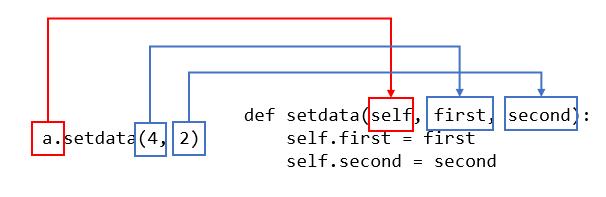

파이썬 메서드의 첫 번째 매개변수 이름은 관례적으로 self를 사용한다.   
객체를 호출할 때 호출한 객체 자신이 전달되기 때문에 self라는 이름를 사용한 것이다.   
물론 self말고 다른 이름을 사용해도 상관없다.

> 메서드의 첫 번째 매개변수 self를 명시적으로 구현하는 것은 파이썬만의 독특한 특징이다. 예를 들어 자바 같은 언어는 첫 번째 매개변수 self가 필요없다.

***
#### 메서드의 또 다른 호출 방법

```python
잘 사용하지는 않지만 다음과 같이 클래스를 통해 메서드를 호출하는 것도 가능하다.

>>> a = FourCal()
>>> FourCal.setdata(a, 4, 2)
위와 같이 클래스이름.메서드 형태로 호출할 때는 객체 a를 첫 번째 매개변수 self에 꼭 전달해 주어야 한다. 반면에 다음처럼 객체.메서드 형태로 호출할 때는 self를 반드시 생략해서 호출해야 한다.

>>> a = FourCal()
>>> a.setdata(4, 2)
```
***

##### setdata 메서드의 수행문

이제 setdata 메서드의 수행문에 대해 알아보자.

```python
def setdata(self, first, second):   # 메서드의 매개변수
    self.first = first              # 메서드의 수행문
    self.second = second            # 메서드의 수행문

a.setdata(4, 2)처럼 호출하면 setdata 메서드의 매개변수 first, second에는 각각 값 4와 2가 전달되어 setdata 메서드의 수행문은 다음과 같이 해석된다.

self.first = 4
self.second = 2

self는 전달된 객체 a이므로 다시 다음과 같이 해석된다.

a.first = 4
a.second = 2

a.first = 4 라는 문장이 수행되면 a 객체에 객체변수 first가 생성되고 4라는 값이 저장된다. 마찬가지로 a.second = 2 라는 문장이 수행되면 a 객체에 객체변수 second가 생성되고 2라는 값이 저장된다.
```
> 객체에 생성되는 객체만의 변수를 객체변수라고 부른다.





In [9]:
a = FourCal()
a.setdata(4, 2)
print(a.first)
print(a.second)

4
2


이번에는 다음과 같이 a, b 객체를 만들어 보자.

In [10]:
a = FourCal()
b = FourCal()

그리고 a 객체의 객체변수 first를 다음과 같이 생성한다.

In [11]:
a.setdata(4, 2)
print(a.first)

4


이번에는 b 객체의 객체변수 first를 다음과 같이 생성한다.

In [12]:
b.setdata(3, 7)
print(b.first)

3


자, 이제 여러분에게 아주 중요한 질문을 한 가지 하겠다. 위와 같이 진행하면 b 객체의 객체변수 first에는 값 3이 저장된다는 것을 확인할 수 있었다. 그렇다면 a 객체의 first는 3으로 변할까? 아니면 기존 값 4를 유지할까?

다음과 같이 그 결과를 확인해 보자.

In [13]:
print(a.first)

4


a 객체의 first 값은 b 객체의 first 값에 영향받지 않고 원래 값을 유지하고 있음을 확인할 수 있다.   

이 예제를 통해 여러분에게 강조하고 싶은 점이 바로 이것이다.   
>**클래스로 만든 객체의 객체변수는 다른 객체의 객체변수에 상관없이 독립적인 값을 유지한다.**  
클래스에서는 이 부분을 이해하는 것이 가장 중요하다.

다음은 현재까지 완성된 FourCal 클래스이다.

```python
>>> class FourCal:
...     def setdata(self, first, second):
...         self.first = first
...         self.second = second
...
>>>
지금까지 살펴본 내용이 바로 위 4줄을 설명하기 위한 것이었다. 위에서 설명한 것들이 이해가 되지 않는다면 다시 한 번 읽어 보기 바란다. 이 부분을 이해하지 못하면 다음으로 넘어갈수 없기 때문이다.



#### 더하기 기능 만들기

자! 그럼 2개의 숫자 값을 설정해 주었으니 2개의 숫자를 더하는 기능을 방금 만든 클래스에 추가해 보자. 우리는 다음과 같이 더하기 기능을 갖춘 클래스를 만들어야 한다.

```python
>>> a = FourCal()
>>> a.setdata(4, 2)
>>> a.add()
6
```

이 연산이 가능하도록 다음과 같이 FourCal 클래스를 만들어 보자.

In [17]:
class FourCalc:
    def setdata(self, first, second):
        self.first = first
        self.second = second
    def add(self):
        return self.first + self.second


새롭게 추가된 것은 add 메서드이다. 이제 클래스를 사용해 보자.

In [18]:
a = FourCalc()
a.setdata(4, 2)

위와 같이 호출하면 앞에서 살펴보았듯이 a객체의 first, second 객체변수에는 각각 값 4와 2가 저장될 것이다.

이제 add 메서드를 호출해 보자.

In [19]:
a.add()

6

#### 곱하기, 빼기, 나누기 기능 만들기
이번에는 곱하기, 빼기, 나누기 등을 할 수 있게 프로그램을 만들어 보자.

In [20]:
class FourCalc:
    def setdata(self, first, second):
        self.first = first
        self.second = second
    def add(self):
        return self.first + self.second
    def mul(self):
        return self.first * self.second
    def sub(self):
        return self.first - self.second
    def div(self):
        return self.first / self.second

In [21]:
a = FourCalc()
b = FourCalc()
a.setdata(4, 2)
b.setdata(3, 8)

In [22]:
print(a.add())
print(a.mul())
print(a.sub())
print(a.div())
print(b.add())
print(b.mul())
print(b.sub())
print(b.div())

6
8
2
2.0
11
24
-5
0.375


### 생성자 (Constructor)
이번에는 우리가 만든 FourCal 클래스를 다음과 같이 사용해 보자.